In [42]:
import pandas as pd
import numpy as np
import utils
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

1. Carga de datos:
* Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.
* Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.


In [27]:
data_path_train='../ejercicios_core/data/heart_disease_uci.csv'
df = utils.cargar_datos(data_path_train)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [28]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Clevel

In [29]:
utils.estadisticas_descriptivas(df)

Estadisticas del dataset
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    

In [30]:
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
thalch,865,55,5.98
exang,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


In [31]:
# Imputar valores nulos
# Para columnas numéricas, imputar con la mediana
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Para columnas categóricas, imputar con el valor más frecuente
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_27116\1561806373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
C:\Users\ENRIF\AppData\Local\Temp\ipykernel_27116\1561806373.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [32]:
##Verificacion luego de imputacion
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
id,920,0,0.0
age,920,0,0.0
sex,920,0,0.0
dataset,920,0,0.0
cp,920,0,0.0
trestbps,920,0,0.0
chol,920,0,0.0
fbs,920,0,0.0
restecg,920,0,0.0
thalch,920,0,0.0


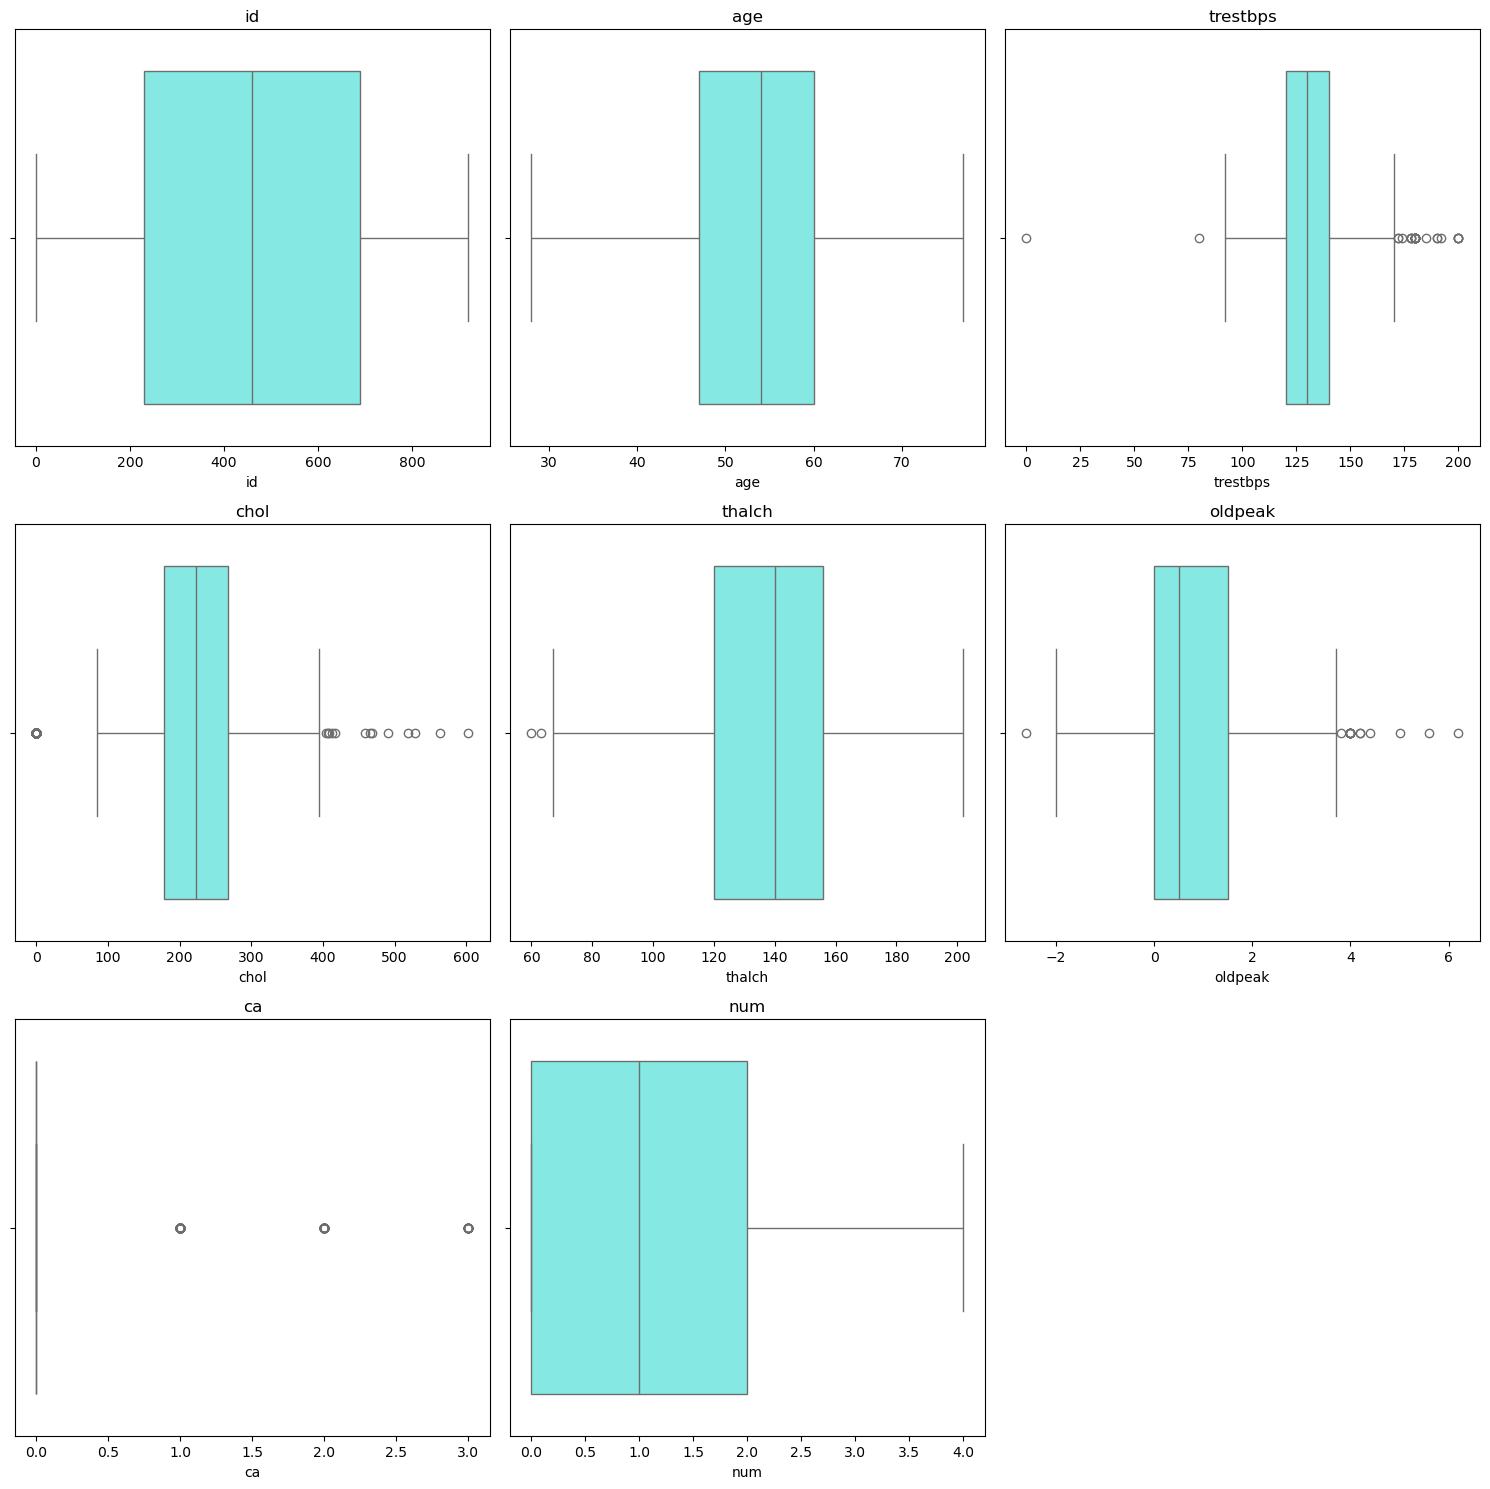

In [33]:
numerical_values = df.select_dtypes(include=['float64', 'int64']).columns
utils.plot_grafico_outliers(numerical_values, 3, 3,df)

In [34]:
# Convertir columnas categóricas a formato numérico utilizando LabelEncoder
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs','dataset']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Normalizar las columnas numéricas
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

2. Exploración y preprocesamiento de datos:
* Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).


In [35]:
# división de datos
X = df.drop(columns=['num'])  # Excluir la columna objetivo
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Convertir a binaria

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar balance de la variable objetivo
print("Distribución de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("Distribución de la variable objetivo en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Distribución de la variable objetivo en el conjunto de entrenamiento:
num
1    0.552989
0    0.447011
Name: proportion, dtype: float64
Distribución de la variable objetivo en el conjunto de prueba:
num
1    0.554348
0    0.445652
Name: proportion, dtype: float64


Debido a que se encuentran valores 0 para algunas variables y estas son variables medicas se procede a imputar los valores 0 de acuerdo a la distribucion de las mimas. Es decir, se considerara la media para las variables que tienen una distribucion normal y mediana para los que no tienen distribucion normal.

In [36]:
###Verificar si la distribucion es normal en base a las estadisticas descriptivas
def check_normality(data, col):
    """
    Verificacion de distribucion en base a los datos de estadistica descriptiva 
    y las columnas del dataset
    
    Args:
        data: pandas DataFrame 
        col: column name

    Returns:
        bool: True si normal, False en otro
    """
    stats = data[col].describe()
    mean = stats['mean']
    median = stats['50%']  # 50th percentile en la mediana
    mode = data[col].mode()[0]  # Moda podria tener multiples valores, tomar el primero

    # Check if mean, median, and mode are relatively close
    if abs(mean - median) / stats['std'] < 0.1 and abs(mean - mode) / stats['std'] < 0.1:
        return True  # Approximately normal
    else:
        return False  # Not approximately normal
    

# Asumiendo el diccionario de las estadisticas descriptivas resultantes de utils
# y verificando si la distribucion es normal a traves del check_normality en utils
#Comprobaremos si las columnas tienen una distribucion normal o no para imputar de acuerdo al mismo
## Codigo desarrollado con ayuda de chatgpt
for col in ['trestbps', 'chol']:  ##Columnas con valores 0 presentes
    is_normal = check_normality(X_train, col)
    if is_normal:
        # Impute with mean if available, otherwise use column mean
        mean_value = df[col].get('Mean', X_train[col].mean()) # Get 'Mean' or calculate if missing
        X_train[col] = X_train[col].replace(0, mean_value)
        X_test[col] = X_test[col].replace(0, mean_value)
    else:
        # Impute with median if available, otherwise use column median
        median_value = df[col].get('median', X_train[col].median()) # Get 'median' or calculate if missing
        X_train[col] = X_train[col].replace(0, median_value)
        X_test[col] = X_test[col].replace(0, median_value)

3. Implementación de la MLP con Dropout:
* Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
* Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
* Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).


In [37]:
#Implementación de la MLP con Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Entrenamiento del modelo:
* Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
* Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

In [39]:
#Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5287 - loss: 21.3051 - val_accuracy: 0.5676 - val_loss: 9.2052
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4694 - loss: 17.6090 - val_accuracy: 0.5878 - val_loss: 1.4554
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5238 - loss: 12.6450 - val_accuracy: 0.5743 - val_loss: 4.9893
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5492 - loss: 9.9704 - val_accuracy: 0.5946 - val_loss: 1.1222
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5654 - loss: 8.0342 - val_accuracy: 0.5811 - val_loss: 3.5375
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5402 - loss: 6.0522 - val_accuracy: 0.5878 - val_loss: 3.1004
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4843 - loss: 6.9451 - val_accuracy: 0.5878 - val_loss: 2.5009
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5303 - loss: 5.8271 - val_accuracy: 0.59

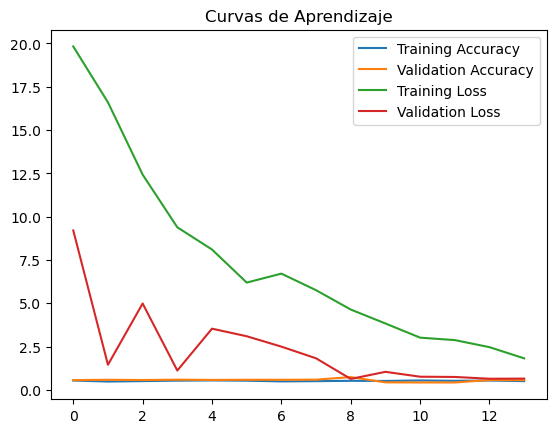

In [41]:
# Visualizar las curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Curvas de Aprendizaje')
plt.show()

5. Evaluación del modelo:
* Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
* Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.


In [43]:
# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        82
           1       0.80      0.72      0.76       102

    accuracy                           0.74       184
   macro avg       0.75      0.75      0.74       184
weighted avg       0.75      0.74      0.75       184

Matriz de confusión:
[[64 18]
 [29 73]]


El dataset de enfermedades cardíacas contiene registros de diferentes datasets, incluyendo Cleveland y VA Long Beach, con características como edad, sexo, tipo de dolor torácico y resultados de pruebas clínicas. Tras imputar valores nulos y escalar los datos, se aplicó un MLP con técnicas como dropout y early stopping, obteniendo una precisión general del 74% en el conjunto de prueba. La clase 0 tuvo un recall del 78% y la clase 1 del 72%, con un F1-score promedio ponderado de 0.75. La matriz de confusión mostró 64 aciertos para la clase 0 y 73 para la clase 1, con 47 errores combinados. Comparado con un MLP básico, el uso de dropout y early stopping mejoró la capacidad del modelo para evitar sobreajuste, manteniendo un equilibrio entre precisión y generalización.